In [136]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [137]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [138]:
y.shape

(70000,)

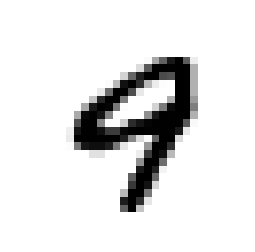

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[69999]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[69999]

9.0

In [166]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [167]:
X2_train, X2_test, y2_train, y2_test = X[:50000], X[50000:], y[:50000], y[50000:]

In [168]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
X_train.shape

(60000, 784)

In [169]:
shuffle_index2 = np.random.permutation(50000)
X2_train, y2_train = X2_train[shuffle_index2], y2_train[shuffle_index2]
X2_train.shape

(50000, 784)

In [8]:
y_train_9 = (y_train == 9) # True for all 5s, False for all other digits.
y_test_9 = (y_test == 9)

In [175]:
y2_train_9 = (y2_train == 9) # True for all 5s, False for all other digits.
y2_test_9 = (y2_test == 9)

In [173]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [177]:
from sklearn.linear_model import SGDClassifier
sgd_clf2 = SGDClassifier(random_state=20)
sgd_clf2.fit(X2_train, y2_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=20, shuffle=True, verbose=0,
       warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [190]:
sgd_clf2.predict(X2_train)

array([ 0.,  2.,  1., ...,  6.,  0.,  8.])

Accuracy

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([ 0.945  ,  0.94885,  0.94965])

In [179]:
cross_val_score(sgd_clf2, X2_train, y2_train, cv=3, scoring="accuracy")

array([ 0.90071986,  0.90939638,  0.9031445 ])

Confusion Matrix

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)
print(y_train_pred)

[ True False False ..., False False False]


In [201]:
from sklearn.metrics import confusion_matrix
sgd_conf_mx = confusion_matrix(y_train_9, y_train_pred)

In [192]:
from sklearn.model_selection import cross_val_predict
y_train_pred2 = cross_val_predict(sgd_clf2, X2_train, y2_train, cv=3)
print(y_train_pred2)

[ 0.  2.  1. ...,  6.  0.  8.]


In [204]:
from sklearn.metrics import confusion_matrix
sgd2_conf_mx = confusion_matrix(y2_train, y_train_pred2)
print(sgd2_conf_mx)

[[5732    4   34   15   24   26   31   11   46]
 [   1 6439   41   24   36   35    6   18  142]
 [  60   66 5284  124   81   32   70   88  153]
 [  54   30  221 5201   57  344   29   86  109]
 [  24   54   32   15 5583   35   24   36   39]
 [  98   31   63  328  208 4304  117   45  227]
 [  88   30  100    9   70  103 5489    6   23]
 [  45   38   51   35  146    9    6 5909   26]
 [  23   66   41   87  108  159   15   21 1280]]


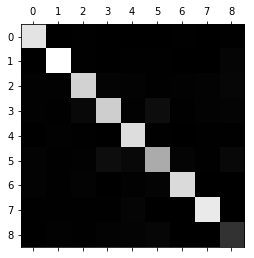

In [205]:
plt.matshow(sgd2_conf_mx, cmap=plt.cm.gray)
plt.show()

Precision and Recall

In [14]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_9, y_train_pred))
print(recall_score(y_train_9, y_train_pred))

0.720751761942
0.773575390822


In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.74622993351710731

Precision/Recall Tradeoff

In [35]:
y_train_9.shape , X_train.shape

((60000,), (60000, 784))

In [17]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, method="decision_function")
y_scores.shape

(60000,)

In [195]:
y_train_pred2.shape

(50000,)

Classification report for 50000 sample training set

In [197]:
from sklearn import metrics
print ('Score:  ',(metrics.classification_report(y_train_pred2, y2_train)))

Score:                precision    recall  f1-score   support

        0.0       0.97      0.94      0.95      6125
        1.0       0.96      0.95      0.95      6758
        2.0       0.89      0.90      0.89      5867
        3.0       0.85      0.89      0.87      5838
        4.0       0.96      0.88      0.92      6313
        5.0       0.79      0.85      0.82      5047
        6.0       0.93      0.95      0.94      5787
        7.0       0.94      0.95      0.95      6220
        8.0       0.71      0.63      0.67      2045

avg / total       0.91      0.90      0.90     50000



In [18]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

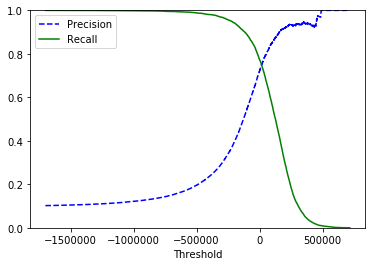

In [19]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

RBF

Start fitting. This may take a while
Confusion matrix:
[[2258    1    4    1    2    2    3    1    4    2]
 [   1 2566    9    1    1    0    0    7    3    0]
 [   4    1 2280    5    4    0    1    9    8    2]
 [   0    0   14 2304    1   13    0    6    8    2]
 [   2    2    2    0 2183    0    7    5    0   10]
 [   4    0    0   16    3 2026   12    1    4    3]
 [   7    5    3    0    5    2 2245    0    4    0]
 [   1    6   11    2    5    1    0 2373    5   13]
 [   3    9    4    9    4   10    2    3 2166    5]
 [   3    2    2    6   19    6    0   12   10 2329]]
Accuracy: 0.9840
out: [ 4.]
Label: 4.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


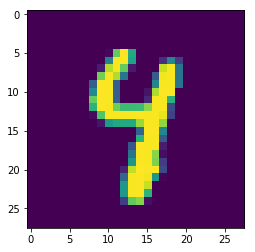

In [156]:
import numpy as np


def main():
    """Orchestrate the retrival of data, training and testing."""
    data = get_data()

    # Get classifier
    from sklearn.svm import SVC
    clf = SVC(probability=False,  # cache_size=200,
              kernel="rbf", C=2.8, gamma=.0073)

    print("Start fitting. This may take a while")

    # take all of it - make that number lower for experiments
    examples = len(data['train']['X'])
    clf.fit(data['train']['X'][:examples], data['train']['y'][:examples])

    analyze(clf, data)


def analyze(clf, data):
    """
    Analyze how well a classifier performs on data.

    Parameters
    ----------
    clf : classifier object
    data : dict
    """
    # Get confusion matrix
    from sklearn import metrics
    predicted = clf.predict(data['test']['X'])
    print("Confusion matrix:\n%s" %
          metrics.confusion_matrix(data['test']['y'],
                                   predicted))
    print("Accuracy: %0.4f" % metrics.accuracy_score(data['test']['y'],
                                                     predicted))

    # Print example
    try_id = 3
    out = clf.predict(data['test']['X'][try_id])  # clf.predict_proba
    print("out: %s" % out)
    size = int(len(data['test']['X'][try_id])**(0.5))
    view_image(data['test']['X'][try_id].reshape((size, size)),
               data['test']['y'][try_id])


def view_image(image, label=""):
    """
    View a single image.

    Parameters
    ----------
    image : numpy array
        Make sure this is of the shape you want.
    label : str
    """
    from matplotlib.pyplot import show, imshow, cm
    print("Label: %s" % label)
    imshow(image) #cmap=cm.gray)
    show()


def get_data():
    """
    Get data ready to learn with.

    Returns
    -------
    dict
    """
    simple = False
    if simple:  # Load the simple, but similar digits dataset
        from sklearn.datasets import load_digits
        from sklearn.utils import shuffle
        digits = load_digits()
        x = [np.array(el).flatten() for el in digits.images]
        y = digits.target

        # Scale data to [-1, 1] - This is of mayor importance!!!
        # In this case, I know the range and thus I can (and should) scale
        # manually. However, this might not always be the case.
        # Then try sklearn.preprocessing.MinMaxScaler or
        # sklearn.preprocessing.StandardScaler
        x = x/255.0*2 - 1

        x, y = shuffle(x, y, random_state=0)

        from sklearn.cross_validation import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                            test_size=0.33,
                                                            random_state=42)
        data = {'train': {'X': x_train,
                          'y': y_train},
                'test': {'X': x_test,
                         'y': y_test}}
    else:  # Load the original dataset
        from sklearn.datasets import fetch_mldata
        from sklearn.utils import shuffle
        mnist = fetch_mldata('MNIST original')

        x = mnist.data
        y = mnist.target

        # Scale data to [-1, 1] - This is of mayor importance!!!
        x = x/255.0*2 - 1

        x, y = shuffle(x, y, random_state=0)

        from sklearn.cross_validation import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                            test_size=0.33,
                                                            random_state=42)
        data = {'train': {'X': x_train,
                          'y': y_train},
                'test': {'X': x_test,
                         'y': y_test}}
    return data


if __name__ == '__main__':
    main()
    


Start fitting. This may take a while
Confusion matrix:
[[2258    1    4    1    2    2    3    1    4    2]
 [   1 2564    9    1    2    0    0    8    3    0]
 [   4    1 2279    5    4    0    1   11    8    1]
 [   0    0   15 2300    1   14    0    6    9    3]
 [   2    2    3    0 2179    0    7    4    1   13]
 [   4    0    0   15    3 2026   12    1    4    4]
 [   7    5    3    0    5    2 2245    0    4    0]
 [   1    6   12    2    6    1    0 2367    5   17]
 [   3    9    4    9    5   10    1    3 2166    5]
 [   2    1    2    6   21    7    0   13    9 2328]]
Accuracy: 0.9832
out: [ 4.]
Label: 4.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


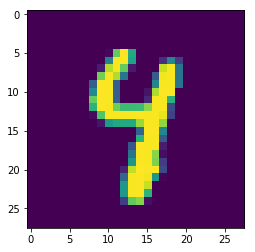

In [200]:
def main():
    """Orchestrate the retrival of data, training and testing."""
    data = get_data2()

    # Get classifier
    from sklearn.svm import SVC
    clf = SVC(probability=False,  # cache_size=200,
              kernel="rbf", C=1.8, gamma=.0073)

    print("Start fitting. This may take a while")

    # take all of it - make that number lower for experiments
    examples = len(data['train']['X'])
    clf.fit(data['train']['X'][:examples], data['train']['y'][:examples])

    analyze2(clf, data)

def analyze2(clf, data):
    """
    Analyze how well a classifier performs on data.

    Parameters
    ----------
    clf : classifier object
    data : dict
    """
    # Get confusion matrix
    from sklearn import metrics
    predicted = clf.predict(data['test']['X'])
    print("Confusion matrix:\n%s" %
          metrics.confusion_matrix(data['test']['y'],
                                   predicted))
    print("Accuracy: %0.4f" % metrics.accuracy_score(data['test']['y'],
                                                     predicted))

    # Print example
    try_id = 3
    out = clf.predict(data['test']['X'][try_id])  # clf.predict_proba
    print("out: %s" % out)
    size = int(len(data['test']['X'][try_id])**(0.5))
    view_image(data['test']['X'][try_id].reshape((size, size)),
               data['test']['y'][try_id])


def view_image(image, label=""):
    """
    View a single image.

    Parameters
    ----------
    image : numpy array
        Make sure this is of the shape you want.
    label : str
    """
    from matplotlib.pyplot import show, imshow, cm
    print("Label: %s" % label)
    imshow(image) #cmap=cm.gray)
    show()
    
def get_data2():
    """
    Get data ready to learn with.

    Returns
    -------
    dict
    """
    simple = False
    if simple:  # Load the simple, but similar digits dataset
        from sklearn.datasets import load_digits
        from sklearn.utils import shuffle
        digits = load_digits()
        x = [np.array(el).flatten() for el in digits.images]
        y = digits.target

        # Scale data to [-1, 1] - This is of mayor importance!!!
        # In this case, I know the range and thus I can (and should) scale
        # manually. However, this might not always be the case.
        # Then try sklearn.preprocessing.MinMaxScaler or
        # sklearn.preprocessing.StandardScaler
        x = x/255.0*2 - 1

        x, y = shuffle(x, y, random_state=0)

        from sklearn.cross_validation import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,
                                                            random_state=24)
        data = {'train': {'X': x_train,
                          'y': y_train},
                'test': {'X': x_test,
                         'y': y_test}}
    else:  # Load the original dataset
        from sklearn.datasets import fetch_mldata
        from sklearn.utils import shuffle
        mnist = fetch_mldata('MNIST original')

        x = mnist.data
        y = mnist.target

        # Scale data to [-1, 1] - This is of mayor importance!!!
        x = x/255.0*2 - 1

        x, y = shuffle(x, y, random_state=0)

        from sklearn.cross_validation import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                            test_size=0.33,
                                                            random_state=42)
        data = {'train': {'X': x_train,
                          'y': y_train},
                'test': {'X': x_test,
                         'y': y_test}}
    return data


if __name__ == '__main__':
    main()
    

OHMLP

In [20]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 20 # we iterate twenty times over the entire training set
hidden_size = 512 # there will be 512 neurons in both hidden layers

num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

X_train = X_train.reshape(num_train, height * width) # Flatten data to 1D
X_test = X_test.reshape(num_test, height * width) # Flatten data to 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

inp = Input(shape=(height * width,)) # Our input is a 1D vector of size 784
hidden_1 = Dense(hidden_size, activation='relu')(inp) # First hidden ReLU layer
#hidden_2 = Dense(hidden_size, activation='relu')(hidden_1) # Second hidden ReLU layer
out = Dense(num_classes, activation='softmax')(hidden_1) # Output softmax layer

model_1hid = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model_1hid.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model_1hid.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Y_pred = model_1hid.predict(X_test)

model_1hid.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Using TensorFlow backend.


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 9s - loss: 0.2824 - acc: 0.9199 - val_loss: 0.1223 - val_acc: 0.9670
Epoch 2/20
54000/54000 [==============================] - 8s - loss: 0.1130 - acc: 0.9670 - val_loss: 0.0870 - val_acc: 0.9752
Epoch 3/20
54000/54000 [==============================] - 7s - loss: 0.0752 - acc: 0.9779 - val_loss: 0.0770 - val_acc: 0.9780
Epoch 4/20
54000/54000 [==============================] - 7s - loss: 0.0525 - acc: 0.9849 - val_loss: 0.0717 - val_acc: 0.9795
Epoch 5/20
54000/54000 [==============================] - 7s - loss: 0.0374 - acc: 0.9896 - val_loss: 0.0668 - val_acc: 0.9822
Epoch 6/20
54000/54000 [==============================] - 6s - loss: 0.0282 - acc: 0.9921 - val_loss: 0.0680 - val_acc: 0.9815
Epoch 7/20
54000/54000 [==============================] - 6s - loss: 0.0207 - acc: 0.9947 - val_loss: 0.0714 - val_acc: 0.9795
Epoch 8/20
54000/54000 [==============================] - 7s -

[0.06524743211175292, 0.98499999999999999]

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

Y_1hidpred = model_1hid.predict(X_test)
print(Y_1hidpred)
y_pred1hid = np.argmax(Y_1hidpred, axis=1)
print(y_pred1hid)
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred1hid))

[[  1.85769130e-12   3.79472408e-12   1.68515660e-10 ...,   9.99999642e-01
    1.74644882e-11   3.58721608e-10]
 [  6.98944229e-15   2.75199064e-09   1.00000000e+00 ...,   2.57441361e-22
    1.78371922e-12   2.80104318e-21]
 [  3.05640180e-10   9.99983430e-01   4.61189018e-07 ...,   3.26647523e-06
    1.27516832e-05   3.21555826e-09]
 ..., 
 [  8.14341491e-23   1.48376556e-18   1.28695458e-20 ...,   3.13000237e-10
    7.28337182e-11   1.86887089e-10]
 [  3.23193150e-16   2.58325412e-17   3.73630788e-19 ...,   9.22797821e-16
    5.31726592e-08   1.13263790e-16]
 [  1.82933665e-13   3.27459381e-18   1.25295214e-14 ...,   1.98194461e-22
    2.57179932e-17   8.37697387e-18]]
[7 2 1 ..., 4 5 6]
[[ 972    1    1    0    1    0    2    1    2    0]
 [   0 1127    2    0    0    1    2    1    2    0]
 [   2    1 1013    3    1    0    2    5    5    0]
 [   0    0    1  996    0    3    0    3    4    3]
 [   1    0    2    1  969    0    3    0    0    6]
 [   2    0    0    9    2  872    1

In [34]:
X_train.shape, Y_train.shape

((60000, 784), (60000, 10))

THMLP

In [139]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 20 # we iterate twenty times over the entire training set
hidden_size = 512 # there will be 512 neurons in both hidden layers

num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

X_train = X_train.reshape(num_train, height * width) # Flatten data to 1D
X_test = X_test.reshape(num_test, height * width) # Flatten data to 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [40]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 20 # we iterate twenty times over the entire training set
hidden_size = 512 # there will be 512 neurons in both hidden layers

num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

X_train = X_train.reshape(num_train, height * width) # Flatten data to 1D
X_test = X_test.reshape(num_test, height * width) # Flatten data to 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

inp = Input(shape=(height * width,)) # Our input is a 1D vector of size 784
hidden_1 = Dense(hidden_size, activation='relu')(inp) # First hidden ReLU layer
hidden_2 = Dense(hidden_size, activation='relu')(hidden_1) # Second hidden ReLU layer
out = Dense(num_classes, activation='softmax')(hidden_2) # Output softmax layer

model2hid = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model2hid.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model2hid.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model2hid.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!
y_2hid = model2hid.predict(X_test) # Evaluate the trained model on the test set!

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 13s - loss: 0.2274 - acc: 0.9334 - val_loss: 0.1251 - val_acc: 0.9608
Epoch 2/20
54000/54000 [==============================] - 12s - loss: 0.0845 - acc: 0.9738 - val_loss: 0.0734 - val_acc: 0.9788
Epoch 3/20
54000/54000 [==============================] - 12s - loss: 0.0521 - acc: 0.9835 - val_loss: 0.0633 - val_acc: 0.9813
Epoch 4/20
54000/54000 [==============================] - 12s - loss: 0.0380 - acc: 0.9876 - val_loss: 0.0857 - val_acc: 0.9772
Epoch 5/20
54000/54000 [==============================] - 12s - loss: 0.0262 - acc: 0.9915 - val_loss: 0.0889 - val_acc: 0.9765
Epoch 6/20
54000/54000 [==============================] - 13s - loss: 0.0208 - acc: 0.9931 - val_loss: 0.0852 - val_acc: 0.9780
Epoch 7/20
54000/54000 [==============================] - 13s - loss: 0.0189 - acc: 0.9935 - val_loss: 0.0713 - val_acc: 0.9817
Epoch 8/20
54000/54000 [==============================]

In [153]:
from keras.metrics import categorical_accuracy

In [154]:
categorical_accuracy(Y_test, y_2hid)

<tf.Tensor 'Cast_10:0' shape=(10000,) dtype=float32>

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

y_2hid = model2hid.predict(X_test)
print(y_2hid)
y_2hid = np.argmax(y_2hid, axis=1)
print(y_2hid)
print(confusion_matrix(np.argmax(Y_test,axis=1), y_2hid))

[[  2.27297264e-19   2.37877188e-12   1.83416667e-11 ...,   9.99999881e-01
    3.75649815e-13   1.43034174e-12]
 [  5.29781937e-19   1.52510959e-14   1.00000000e+00 ...,   3.99300923e-21
    2.03647744e-19   4.24028385e-29]
 [  3.70061620e-10   9.99994636e-01   9.86967052e-07 ...,   2.82228075e-06
    1.48836841e-06   2.17887600e-11]
 ..., 
 [  1.99870310e-20   1.82214191e-17   1.90089942e-21 ...,   6.12173954e-14
    2.80573150e-18   2.29812886e-13]
 [  2.10935156e-21   2.25786517e-28   1.23258530e-23 ...,   8.72938016e-23
    2.32703964e-15   3.36107707e-22]
 [  1.66602485e-12   8.70631893e-19   2.26673978e-18 ...,   9.25921701e-24
    2.37978036e-15   1.32734364e-16]]
[7 2 1 ..., 4 5 6]
[[ 974    1    1    1    0    0    0    1    1    1]
 [   2 1115    7    0    0    3    4    2    2    0]
 [   4    0 1019    0    0    0    1    4    4    0]
 [   0    0    9  991    0    4    0    2    3    1]
 [   2    0    4    1  960    0    2    2    1   10]
 [   3    0    0    8    0  874    3

RBM

In [54]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, Y = mnist.data, mnist.target
X = np.asarray( X, 'float32')
# Scaling between 0 and 1
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling
# Convert to binary images
X = X > 0.5
print ('Input X shape', X.shape)

Input X shape (70000, 784)


In [55]:
from sklearn import cross_validation
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn import svm
from sklearn import metrics
rbm = BernoulliRBM(n_components=200, learning_rate=0.01, batch_size=10, n_iter=5, verbose=True, random_state=None)
sv = clf = svm.SVC(gamma=0.001, C=100.)
clf = Pipeline(steps=[('rbm', rbm), ('clf', sv)])
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split( X, y, test_size=0.2, random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print ('Score:  ',(metrics.classification_report(Y_test, Y_pred)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -99.42, time = 64.94s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -88.00, time = 54.87s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -81.98, time = 49.90s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -77.79, time = 49.60s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -75.07, time = 50.68s
Score:                precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      1312
        1.0       0.98      0.99      0.99      1604
        2.0       0.96      0.97      0.96      1348
        3.0       0.96      0.95      0.95      1427
        4.0       0.95      0.96      0.96      1362
        5.0       0.96      0.95      0.95      1280
        6.0       0.98      0.98      0.98      1397
        7.0       0.97      0.96      0.97      1461
        8.0       0.95      0.95      0.95      1390
        9.0       0.95      0.94      0.94      1419

avg / total       0.96      0.96      0.96     14000



In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[1300,    0,    0,    0,    2,    2,    5,    0,    2,    1],
       [   0, 1588,    7,    1,    1,    0,    0,    1,    3,    3],
       [   5,    6, 1309,    8,    4,    1,    4,    5,    6,    0],
       [   1,    3,   18, 1353,    0,   18,    0,    8,   21,    5],
       [   2,    1,    4,    0, 1312,    0,    6,    5,    5,   27],
       [   6,    1,    6,   16,    2, 1210,   15,    1,   18,    5],
       [  12,    0,    2,    0,    4,    5, 1369,    0,    5,    0],
       [   3,    4,    8,    2,   10,    2,    0, 1408,    2,   22],
       [   3,   11,    5,   20,    4,   14,    2,    2, 1323,    6],
       [   2,    4,    7,   16,   37,    4,    1,   16,    4, 1328]])

    Decision Tree

In [88]:
y_train.shape,X_train.shape

((60000,), (60000, 784))

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

tree_mnist = DecisionTreeClassifier()
a = tree_mnist.fit(X_train,y_train)
tree_predictions = a.predict(X_test)

tree_mse = mean_squared_error(tree_predictions, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.4357576397150043

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tree_predictions)

array([[ 917,    1,    8,    8,    3,   13,   12,    4,    9,    5],
       [   1, 1086,   10,    8,    4,    6,    8,    1,    8,    3],
       [  11,   15,  876,   31,   17,   11,   11,   29,   21,   10],
       [   9,    6,   27,  859,   10,   45,    2,    8,   26,   18],
       [   5,    2,    7,    6,  866,    8,   14,   10,   25,   39],
       [  13,    7,    2,   43,    9,  738,   24,    7,   28,   21],
       [  17,    5,   14,    7,   17,   19,  847,    2,   26,    4],
       [   3,   13,   24,   14,    8,    5,    1,  931,    7,   22],
       [   9,    8,   28,   38,   20,   34,   18,   11,  780,   28],
       [  14,    5,    9,   21,   35,   11,    7,   24,   21,  862]])

In [91]:
from sklearn import cross_validation
from sklearn import metrics

print ('Score:  ',(metrics.classification_report(y_test, tree_predictions)))

Score:                precision    recall  f1-score   support

        0.0       0.92      0.94      0.93       980
        1.0       0.95      0.96      0.95      1135
        2.0       0.87      0.85      0.86      1032
        3.0       0.83      0.85      0.84      1010
        4.0       0.88      0.88      0.88       982
        5.0       0.83      0.83      0.83       892
        6.0       0.90      0.88      0.89       958
        7.0       0.91      0.91      0.91      1028
        8.0       0.82      0.80      0.81       974
        9.0       0.85      0.85      0.85      1009

avg / total       0.88      0.88      0.88     10000



In [92]:
Y_test.shape

(14000,)

In [93]:
from sklearn import metrics
print (metrics.accuracy_score(tree_predictions, y_test))

0.8762


    Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(Xf_train,yf_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [49]:
from sklearn import metrics
y_rf_pred = rf.predict(Xf_test)

print(metrics.accuracy_score(y_rf_pred,y_test))

0.9703


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yf_test, y_rf_pred)

array([[ 969,    1,    1,    0,    0,    2,    3,    1,    3,    0],
       [   0, 1124,    0,    5,    0,    2,    2,    0,    1,    1],
       [   5,    0, 1000,    7,    2,    0,    3,    9,    6,    0],
       [   1,    0,   11,  972,    0,    7,    0,    9,    9,    1],
       [   1,    0,    2,    0,  958,    0,    4,    0,    3,   14],
       [   4,    1,    1,   13,    3,  858,    6,    1,    4,    1],
       [   7,    3,    1,    0,    3,    3,  937,    0,    4,    0],
       [   1,    2,   18,    2,    1,    0,    0,  992,    2,   10],
       [   4,    0,    6,    7,    6,    4,    4,    4,  933,    6],
       [   7,    5,    1,   10,   13,    5,    1,    4,    3,  960]])

In [51]:
from sklearn import cross_validation
from sklearn import metrics

print ('Score:  ',(metrics.classification_report(yf_test, y_rf_pred)))

Score:                precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.97      0.96      1032
          3       0.96      0.96      0.96      1010
          4       0.97      0.98      0.97       982
          5       0.97      0.96      0.97       892
          6       0.98      0.98      0.98       958
          7       0.97      0.96      0.97      1028
          8       0.96      0.96      0.96       974
          9       0.97      0.95      0.96      1009

avg / total       0.97      0.97      0.97     10000



In [57]:
X_train.shape, y_rf_pred.shape

((56000, 784), (10000,))

In [58]:
Xforest, yforest = mnist["data"], mnist["target"]
Xforest.shape

(70000, 784)

In [59]:
Xf_train, Xf_test, yf_train, yf_test = Xforest[:60000], Xforest[60000:], yforest[:60000], yforest[60000:]

In [60]:
shuffle_index = np.random.permutation(60000)
Xf_train, yf_train = Xf_train[shuffle_index], yf_train[shuffle_index]
Xf_train.shape

(60000, 784)

In [76]:
yf_scores = cross_val_predict(rf, Xf_train, yf_train, cv=3)
yf_scores.shape

(60000,)